# Guided Project: Finding Heavy Traffic Indicators on I-94

We're going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

John Hogue made the dataset available, and you can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).


![](i94_figma.png)

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

## Slide 1: The I-94 Traffic Dataset

In [7]:
import pandas as pd

I94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

I94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The data set has 48204 rows and there are no null values in there.

## Slide 2: Analyzing Traffic Volume

Text(0.5, 1.0, 'Westbound Traffice Volume Histogram')

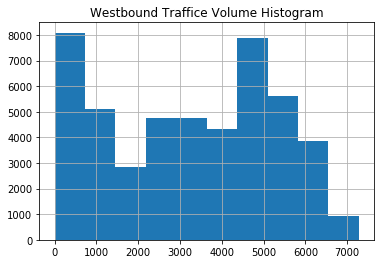

In [8]:
#remember to run the magic!
import matplotlib.pyplot as plt
%matplotlib inline  

I94['traffic_volume'].hist()
plt.title('Westbound Traffice Volume Histogram')

In [9]:
I94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

I think that the date time and night time influence the traffic volume. But we have to look into the data to find out. Traffic volume is the highest in the zero to 1000 bin as well as the 4500 to 5000. The mean volume is around 3200.

About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
About 25% of the time, the traffic volume was four times as much (4,933 cars or more).

## Slide 3: Traffic Volume: Day vs. Night

We'll start by dividing the dataset into two parts:

Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [10]:
I94['date_time']=pd.to_datetime(I94['date_time'])


day = I94.copy()[(I94['date_time'].dt.hour >= 7) & (I94['date_time'].dt.hour < 19)]
print(day.shape)

night = I94.copy()[(I94['date_time'].dt.hour >= 19) | (I94['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


In [11]:
I94.iloc[176:178] #Missing Values

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
176,None,281.17,0.0,0.0,90,Clouds,overcast clouds,2012-10-10 03:00:00,361
177,None,281.25,0.0,0.0,92,Clear,sky is clear,2012-10-10 06:00:00,5875


## Slide 4: Traffic Volume: Day vs. Night (II)

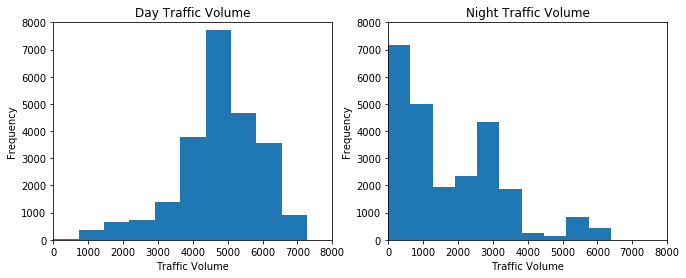

In [12]:
plt.figure(figsize=(11,4))

plt.subplot(1,2,1)
day['traffic_volume'].plot.hist()
plt.title('Day Traffic Volume')
plt.xlabel('Traffic Volume')
plt.xlim(0,8000)
plt.ylim(0,8000)


plt.subplot(1,2,2)
night['traffic_volume'].plot.hist()
plt.title('Night Traffic Volume')
plt.xlabel('Traffic Volume')
plt.xlim(0,8000)
plt.ylim(0,8000)

plt.show()

In [13]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [14]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Day time data is left skewed. Night time data is right skewed. 
So most of the day time traffic is of high volume and most of the night time traffic is of low value. 

Looking at the statistics, 75% of the time there are more cars than the 4252 number are passing. 

Looks like we should only focus on the cars during the day as the night time traffic is rather low. 

## Slide 5: Time Indicators

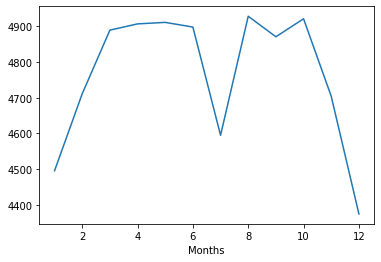

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

In [28]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

plt.plot(by_month['traffic_volume'])
plt.xlabel('Months')
plt.show()

by_month['traffic_volume']


July traffic is significantly lower than its neighbouring months. Also Jan and Nov and Dec traffic is low (cold month). Investigating July across the years. 

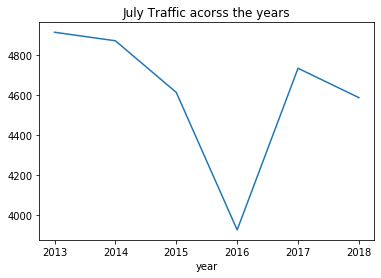

In [16]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.title('July Traffic acorss the years')
plt.show()

## Slide 6: Time Indicators (II)

1. Generate a line plot to visualize how the traffic volume changed each day of the week on average.
2. Analyze the line plot. Do you notice any difference between business days and the weekend?

In [17]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

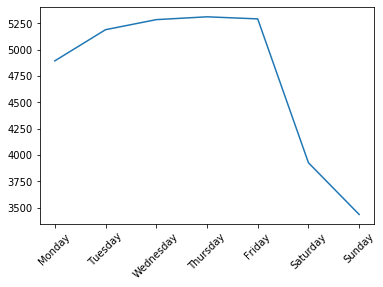

In [18]:
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.plot(day_of_week,by_dayofweek['traffic_volume'])
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

It shows that weekends have low traffic. 

## Slide 7 Time Indicators (III)

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [30]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
by_hour_business = bussiness_days.groupby('hour').mean()
print(by_hour_business['traffic_volume'])


hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64


In [20]:
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_weekend = weekend.groupby('hour').mean()
print(by_hour_weekend['traffic_volume'])

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


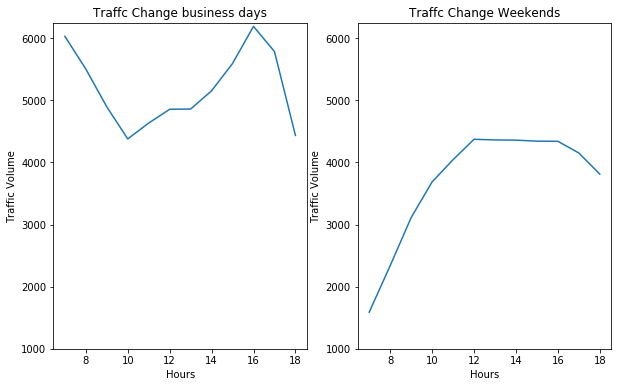

In [21]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)

plt.plot(by_hour_business['traffic_volume'])
plt.title('Traffc Change business days')
plt.xlabel('Hours')
plt.ylabel('Traffic Volume')
plt.ylim(1000,6250)

plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Traffc Change Weekends')
plt.xlabel('Hours')
plt.ylabel('Traffic Volume')
plt.ylim(1000,6250)


plt.show()

Weekdays have two rush hours. one at 7 am and the other at 4 pm which stands to reason. Max traffic  on the weekends is just as much as the minimum of weekday volume. 

Heavy traffic indicators until now are: Season (warm vas holiday seasons and end of year, Weekdays vs weekends, time of day business hours vs none business hours). 



## Slide 8: Weather Indicators

We reached the following conclusions:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.
Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

A few of these columns are numerical so let's start by looking up their correlation values with `traffic_volume`.

In [31]:
I94.info() ## But we focus on the "day" sub data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


temp, rain_1, snow-1h, clouds all are numeraical weathe columns so we can use correlation on those.

In [23]:


day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The correlatons of temp things with traffic volume is weak. Only temp has 0.13 correlation.

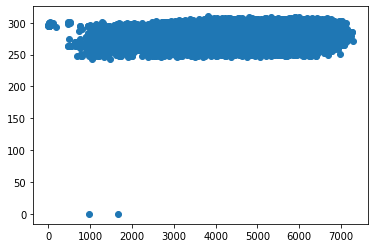

In [24]:
plt.scatter(day['traffic_volume'],day['temp'])

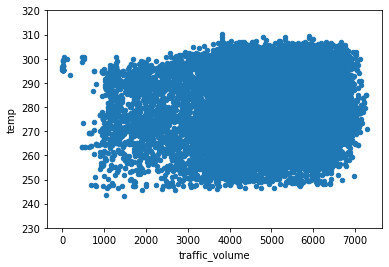

In [25]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320) # two wrong 0K temperatures mess up the y-axis
plt.show()

The temprature is not very crrelated with the traffic volume so not much indication here. 

## Slide 9 - Weather Types

Previously, we examined the correlation between `traffic_volume` and the numerical weather columns. However, we didn't find any reliable indicator of heavy traffic.

To see if we can find more useful data, we'll look next at the categorical weather-related columns: `weather_main` and `weather_description`.

We're going to calculate the average traffic volume associated with each unique value in these two columns. We've already calculated the values for you — we grouped the data by `weather_main` and `weather_description` while using the mean as an aggregate function.

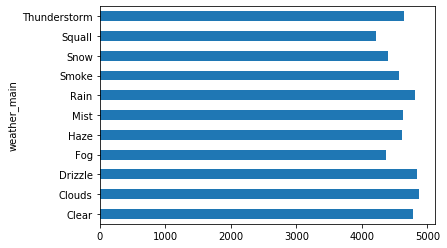

In [38]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()


by_weather_main['traffic_volume'].plot.barh()

Nothing Exceeds 5000 cars, so no indication

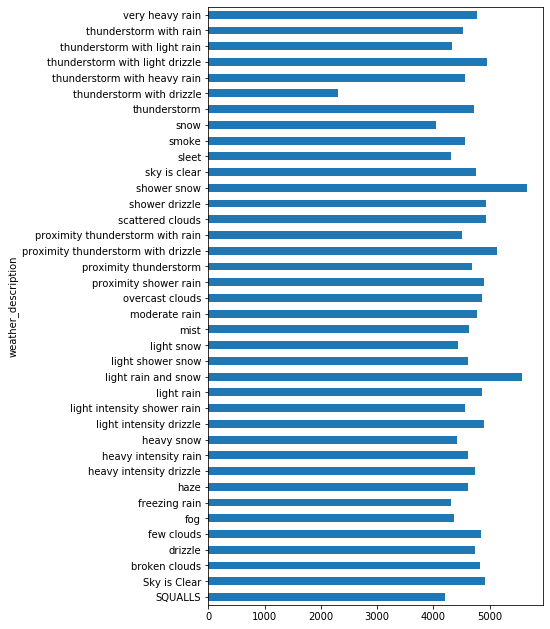

In [27]:
by_weather_description['traffic_volume'].plot.barh(figsize=(6,11))

### Colclusions

It looks like there are three weather types where traffic volume exceeds 5,000:

Shower snow
Light rain and snow
Proximity thunderstorm with drizzle
It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.